# **Employee Salary Prediction Model**

**This model will predict the employee's salary based on their Age, Gender, Education Level, Years of Experience. This model will train on real world data so it's possible that in dataset needs to cleans, handle null values and outliers. In last, will see that data in in linear or non linear form according to this will apply Machine Learnin model.**

### **Importing Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Real World dataset**

In [ ]:
dataset = pd.read_csv("/content/Salary Data.csv")
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Seeing shape of dataset here is 375 rows and 6 columns**

In [ ]:
dataset.shape

(375, 6)

**In dataset here is null values exist**

In [ ]:
dataset.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


**Here is just 2 null values in dataset. So, drop them from dataset**

In [ ]:
dataset.dropna(inplace = True)

**Now data have no null value**

In [ ]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


### **Outliers**

**Apply loop for displaying graph for seeing here is outliers exist or not**

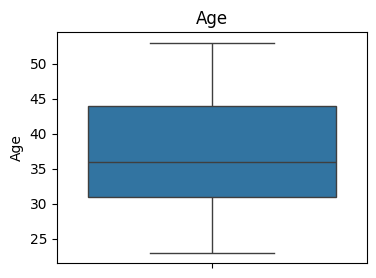

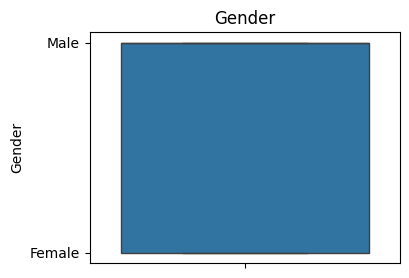

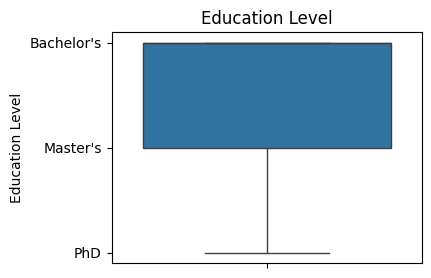

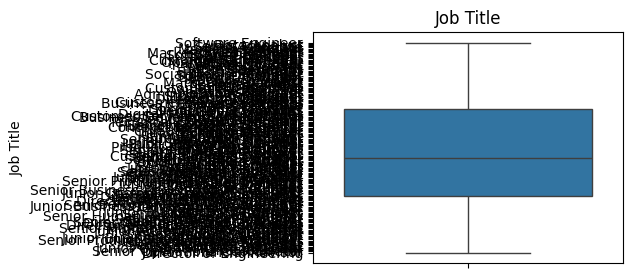

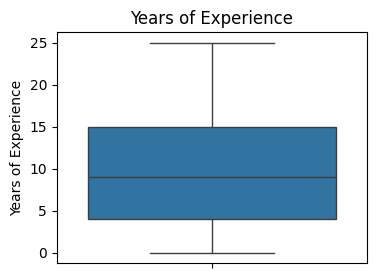

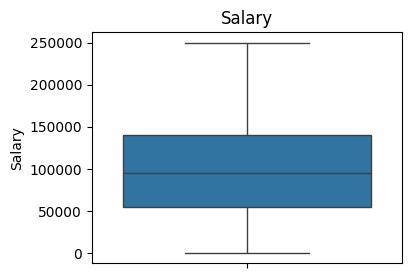

In [ ]:
for i in dataset.columns:
  plt.figure(figsize = (4, 3))
  plt.title(i)
  sns.boxplot(dataset[i])
  plt.show()

**In dataset here is no much outliers**

### **Encoding**

**Apply Ordinal Encoding for converting Categorical data variable to Numerical form**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
dataset["Gender"] = encode.fit_transform(dataset[["Gender"]])
dataset["Education Level"] = encode.fit_transform(dataset[["Education Level"]])

**Now data become**

In [ ]:
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,0.0,159.0,5.0,90000.0
1,28.0,0.0,1.0,17.0,3.0,65000.0
2,45.0,1.0,2.0,130.0,15.0,150000.0
3,36.0,0.0,0.0,101.0,7.0,60000.0
4,52.0,1.0,1.0,22.0,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0.0,0.0,131.0,8.0,85000.0
371,43.0,1.0,1.0,30.0,19.0,170000.0
372,29.0,0.0,0.0,70.0,2.0,40000.0
373,34.0,1.0,0.0,137.0,7.0,90000.0


### **Function Transformer**

**Seeing data variables are normally distributed or not with the help of Distplot if not will apply Function Transformer**

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


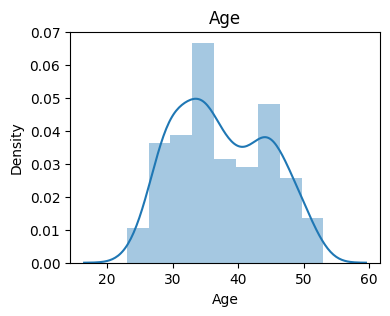

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


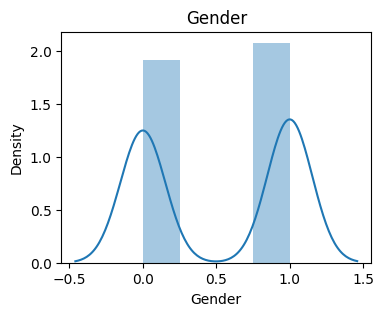

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


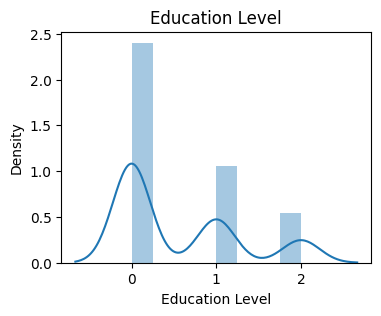

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


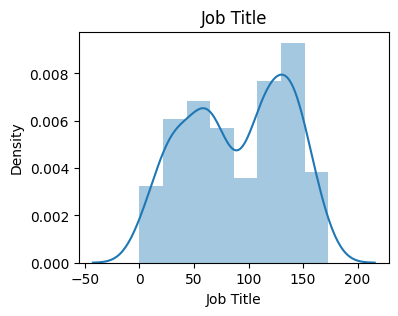

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


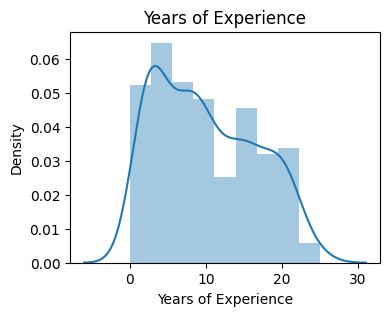

<ipython-input-197-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


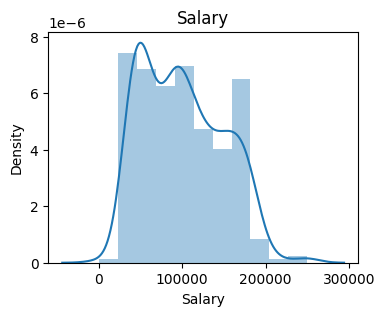

In [ ]:
for i in dataset.select_dtypes(include = ["int64", "float64"]).columns:
  plt.figure(figsize = (4, 3))
  plt.title(i)
  sns.distplot(dataset[i])
  plt.show()

**Variables which are not normally distributed apply Function Transform on it**

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(lambda x : x ** 2)
transformer.fit(dataset[["Age", "Years of Experience", "Education Level", "Job Title"]])

FunctionTransformer(func=<function <lambda> at 0x7e0ea97f9440>)

In [ ]:
dataset["Age"] = transformer.transform(dataset[["Age"]])
dataset["Years of Experience"] = transformer.transform(dataset[["Years of Experience"]])
dataset["Education Level"] = transformer.transform(dataset[["Education Level"]])
dataset["Job Title"] = transformer.transform(dataset[["Job Title"]])

**Now seeing data variables**

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


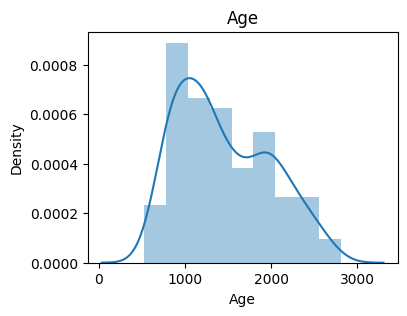

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


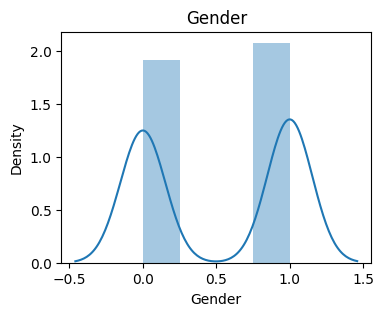

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


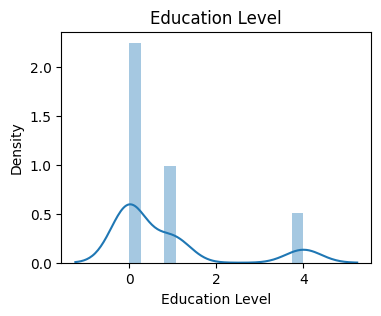

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


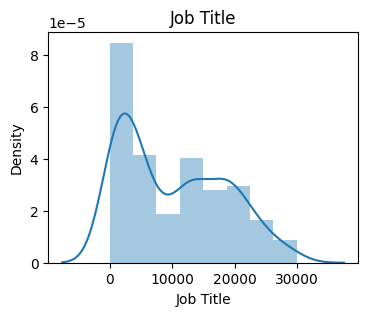

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


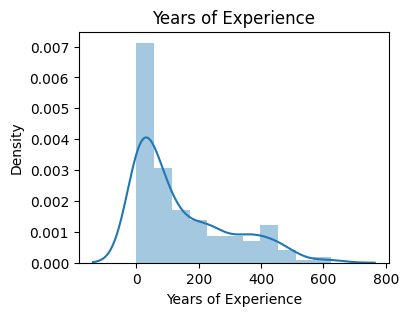

<ipython-input-200-459aafccc122>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


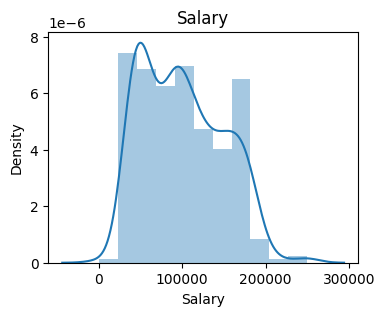

In [ ]:
for i in dataset.select_dtypes(include = ["int64", "float64"]).columns:
  plt.figure(figsize = (4, 3))
  plt.title(i)
  sns.distplot(dataset[i])
  plt.show()

## **Splitting Dataset**

**Splitting dataset in input and output dataset**

In [ ]:
x = dataset.drop(["Job Title", "Salary"], axis = 1, inplace = False)
y = dataset["Salary"]

**Input dataset looks like**

In [ ]:
x.head()

,Age,Gender,Education Level,Years of Experience
0,1024.0,1.0,0.0,25.0
1,784.0,0.0,1.0,9.0
2,2025.0,1.0,4.0,225.0
3,1296.0,0.0,0.0,49.0
4,2704.0,1.0,1.0,400.0


**If in dataset, some varaibles values are larger and some variables values are normal then machine learning model prefer larger value variable and remove it's focus comletely from lower value variable**

### **Standard Scaler**

**Standard scaler convert large value variable to small value variable means reduce the spreadness of variable**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x[["Age"]])
x["Age"] = scaler.transform(x[["Age"]])

In [ ]:
scaler.fit(x[["Years of Experience"]])
x["Years of Experience"] = scaler.transform(x[["Years of Experience"]])

**Now Input dataset looks like**

In [ ]:
x.head()

,Age,Gender,Education Level,Years of Experience
0,-0.789984,1.0,0.0,-0.780327
1,-1.234040,0.0,1.0,-0.885690
2,1.062097,1.0,4.0,0.536718
3,-0.286721,0.0,0.0,-0.622281
4,2.318405,1.0,1.0,1.689132
...,...,...,...,...
370,-0.418088,0.0,0.0,-0.523503
371,0.736457,1.0,1.0,1.432308
372,-1.128577,0.0,0.0,-0.918616
373,-0.545754,1.0,0.0,-0.622281


**Now Splitting the input and output dataset to training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### **Model**

**Dataset are in non-linear form. So, for non-linear form dataset Decision Tree model use**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
tree_model.score(x_train, y_train) * 100, tree_model.score(x_test, y_test) * 100

(97.3091838402198, 91.08400816912659)

In [ ]:
tree_model.predict([[-0.41, 0, 0, -0.52]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([86250.])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
tree_mse = mean_squared_error(y_test, tree_model.predict(x_test))
tree_mae = mean_absolute_error(y_test, tree_model.predict(x_test))
tree_r2 = r2_score(y_test, tree_model.predict(x_test))
tree_mse, tree_mae, tree_r2